In [ ]:
import pandas as pd
#read in CSVs
df1 = pd.read_csv("/Users/ZSL/VENV/repo/text_analysis_methods/all-the-news/articles1.csv")
df2 = pd.read_csv("/Users/ZSL/VENV/repo/text_analysis_methods/all-the-news/articles2.csv")
df3 = pd.read_csv("//Users/ZSL/VENV/repo/text_analysis_methods/all-the-news/articles3.csv")
df4 = pd.read_csv("/Users/ZSL/VENV/repo/text_analysis_methods/fake.csv") 

In [1]:
import glob
import pandas as pd
from natsort import natsorted
files = glob.glob("unprocessed_csvs/*.csv")
files = natsorted(files)

In [2]:
count = 0
for i in files:
    df = pd.read_csv(i)
    df.drop(["Unnamed: 0",], axis=1, inplace=True)
    if count == 0:
        df_all = df.copy(deep=True)
    else:
        df_all = df_all.append(df, ignore_index=True)
    count += 1
#df_all #df_all is the dataframe containing all news stories from reputable publishers.

In [3]:
#create and clean "real" DF
#real_df = df1.append(df2, ignore_index = True).append(df3, ignore_index = True)
real_df = df_all.copy()
real_df.drop(['year','month', 'id', 'url', 'publication', 'author'], axis=1, inplace=True)
real_df = real_df.dropna()
real_df['type'] = 0
real_df = real_df.rename(columns={'content': 'text'})
#real_df #real_df is the dataframe containing cleaned versions of the "real" news stories.

In [4]:
#create and clean "fake" DF
df4 = pd.read_csv("fake.csv") 
fake_df = df4
fake_df.drop(['uuid', 'ord_in_thread', 'language'], axis=1, inplace=True)
fake_df.drop(['crawled', 'site_url', 'country', 'domain_rank'], axis=1, inplace=True)
fake_df.drop(['participants_count', 'likes', 'comments', 'shares'], axis=1, inplace=True)
fake_df.drop(['thread_title'], axis=1, inplace=True)
fake_df.drop(['author', 'spam_score', 'main_img_url', 'replies_count'], axis=1, inplace=True)
fake_df['type'] = 1
fake_df = fake_df.dropna()
fake_df = fake_df.rename(columns={'published': 'date'})
cols = list(fake_df.columns.values)
cols[1] = 'date'
cols[0] = 'title'
fake_df = fake_df[cols]


In [6]:
fake_df = fake_df.filter(items=['text'])
fake_full_text = fake_df['text'].tolist()

real_df = real_df.filter(items=['text'])
real_full_text = real_df['text'].tolist()

In [7]:
import sqlite3
conn = sqlite3.connect('real_fake.db')
c = conn.cursor()
c.execute("""CREATE TABLE IF NOT EXISTS meta (id INTEGER PRIMARY KEY AUTOINCREMENT, source TEXT, 
source_id INTEGER, class TEXT);""")

base_insert_query = """INSERT INTO meta (id, source, source_id, class) VALUES (null, ?,?,?)"""
both_dfs = { "fake":fake_df, "real":real_df}
for label, mydf in both_dfs.items():
    for row in mydf.iterrows():
        df_id = int(row[0])
        
        source = label + "_df"
        myvalues = (source, df_id, label)
        if df_id % 1000 == 0:
            print(df_id)
        c.execute(base_insert_query, myvalues)
conn.commit()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000


In [ ]:

import requests 
import enchant

words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words')
stoplist1 = words.text.split("\r\n")

from nltk.corpus import stopwords
stoplist2 = set(stopwords.words('english'))

stoplist1.extend(stoplist2)

fullstops = list(set(stoplist1))

def remove_stops(stoplist, wordlist):
    result = []
    for i in wordlist:
        if i not in stoplist:
                result.append(i)
    return result

def spellcheck(wordlist):
    result = []
    d = enchant.Dict("en_US")
    for i in wordlist:
        if d.check(i) or d.check(i.capitalize()):
            result.append(i)
         
    return result
def clean_text(list_of_texts):
    fully_cleaned =[]
    #normalize ocr errors
    for i in list_of_texts:
        #lowercase all
        ocr_lower = i.lower()
        #tokenize, remove punctuation and numbers, remove tabs, newlines, etc.
        ocr_cleaner = ocr_lower.replace("\n", " ").replace("\t", " ")
        ocr_tokens = ocr_cleaner.split(" ")
        
        no_numbers_or_punct = []
        for token in ocr_tokens:
            if token.isalpha():
                no_numbers_or_punct.append(token)
            else:
                
                new_token = ""
                for letter in token:
                    if letter.isalpha():
                        new_token += letter
                if new_token != "":
                    no_numbers_or_punct.append(new_token)  
        #almost_ready_before_spellcheck = remove_stops(fullstops, no_numbers_or_punct)
        #almost_ready = spellcheck(almost_ready_before_spellcheck)
        #from nltk.stem import WordNetLemmatizer
        #lemmatization
        #wordnet_lemmatizer = WordNetLemmatizer()
        #lemmas = []
        #for token in almost_ready:
        #    lemma = wordnet_lemmatizer.lemmatize(token)
        #    lemmas.append(lemma)
        
        #ready = [i for i in lemmas if len(i) > 2]
        #fully_cleaned.append(ready)
        fully_cleaned.append(no_numbers_or_punct)
    return fully_cleaned
#cleaned text for fake
fake_cleaned = clean_text(fake_full_text)
real_cleaned = clean_text(real_full_text)

In [8]:
from collections import Counter
both_cleaned = [fake_cleaned, real_cleaned]

ocr_counters = []
for x in both_cleaned:
    ocr_counters_mini = [Counter(i) for i in x]
    #take only the first 500 articles in each
    #NOTE: This step should be randomized in the future, and the index of each article
    # used in a sample should be stored.
    ocr_counters.extend(ocr_counters_mini[:500])

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
v = DictVectorizer()
X = v.fit_transform(ocr_counters)
y = TfidfTransformer()
Z = y.fit_transform(X)
#fake only right now
scaled_vsm = Z.toarray()
#fake_cleaned[-1], scaled_vsm[len(fake_cleaned)-1]
v.vocabulary_["obama"] #Feature number outputed by .vocabulary is the index of the searched word in the array.

22717

In [9]:
scaled_vsm[0][22717], ocr_counters[0]["obama"]
y = list(range(len(scaled_vsm)))
y[:5]
def make_record():
    labels = ["score", "train_indicies", "test_indicies", "train_size", "test_size", "random_state"]
    record = pd.DataFrame(columns=labels)
    return record
#record = make_record()

In [23]:
from sklearn.model_selection import train_test_split

rows = []
for i in range(75):
    tr_s = 750
    te_s = 250
    X_train, X_test, y_train, y_test = train_test_split(scaled_vsm, y, train_size=tr_s, test_size=te_s, random_state=i)

    #take 500 random samples from real_df
    #take 500 random samples from fake_df

    #evaluate accuracy
    #run over and over and derive mean accuracy
    train_labels = []
    for pos in y_train:
        if pos > 499:
            #real = 0
            value = 0
        else:
            #fake = 1
            value = 1
        train_labels.append(value)
    test_labels = []
    for pos in y_test:
        if pos > 499:
            #real = 0
            value = 0
        else:
            #fake = 1
            value = 1
        test_labels.append(value)
    from sklearn.linear_model import LogisticRegression
    # Create classifiers
    lr = LogisticRegression()
    lr.fit(X_train, train_labels)
    results = lr.predict(X_test)
    score = lr.score(X_test, test_labels)
    y_train = [str(u) for u in y_train]
    y_test = [str(v) for v in y_test]
    a = ', '.join(y_train)
    b = ", ".join(y_test)
    row = [i, a, b, score, tr_s, te_s, "tfidf_full_text"]
    rows.append(row)
cols=["seed", "train_ids", "test_ids", "rate", "train_size", "test_size", "features_used"]

count    75.000000
mean      0.920800
std       0.015755
min       0.876000
25%       0.912000
50%       0.924000
75%       0.930000
max       0.956000
Name: rate, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2a4110550>]], dtype=object)

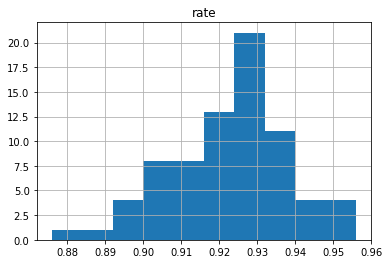

In [24]:
df_results = pd.DataFrame.from_records(rows, columns=cols)
#df_results.to_csv("test1.csv")
print(df_results['rate'].describe())
import matplotlib
%matplotlib inline
df_results.hist(column='rate')

In [ ]:
X_train[0], y_train[0]

In [ ]:
list(X_train[0]) == list(scaled_vsm[7634])

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
len(X_test)